# Linear regression - Regularization

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/linear_regression/regularization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

import matplotlib.pyplot as plt
%matplotlib inline

## Principle

A way to address the problematic of over-fitting, which results from a model having to high complexity (too many parameters that can be adjusted), is regularization. In regularization, a penalty is added to the loss function during training. The idea is to keep the size of the to be adjusted model parameters low. Three examples are considered here.

**Important note:** regularization techniques are sensitive to scale of the features. Consequently one usually always re-scale the features before applying a regularized model.

## Synthetic data set

The data set is generated based on $y = w_o + w_1 x + w_2 x^2 + \epsilon$ 

In [2]:
wo = +30.0
w1 = +1.0
w2 = -1.0

We generate a data set of $m$ points by adding Gaussian noise $\epsilon \sim N(0,\sigma)$ to the model 

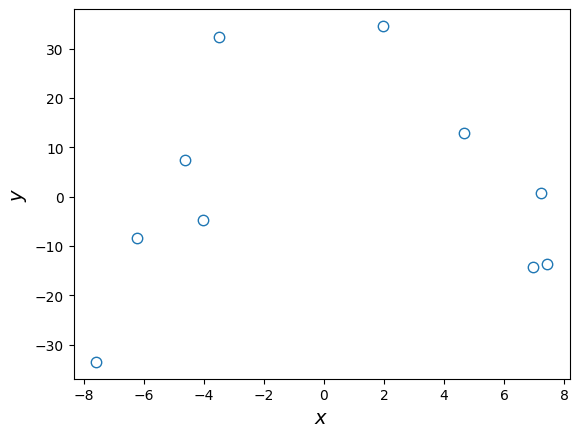

In [3]:
sigma = 15
m = 10

# Note: the shape of X is such to be compatible with Scikit-Learn classes
np.random.seed(10)
x = np.random.rand(m,1)*20.0 - 8.0
X = np.c_[x]
y = wo + w1*x + w2*x**2 + np.random.normal(0, sigma, size=(m, 1))

# plotting the generated data set
plt.plot(x, y, ".", markersize=15, markerfacecolor='white')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

## Polynomial regression

Unless the degree of the polynomial is adjusted correctly, polynomial regression can easily result in under or over fitting

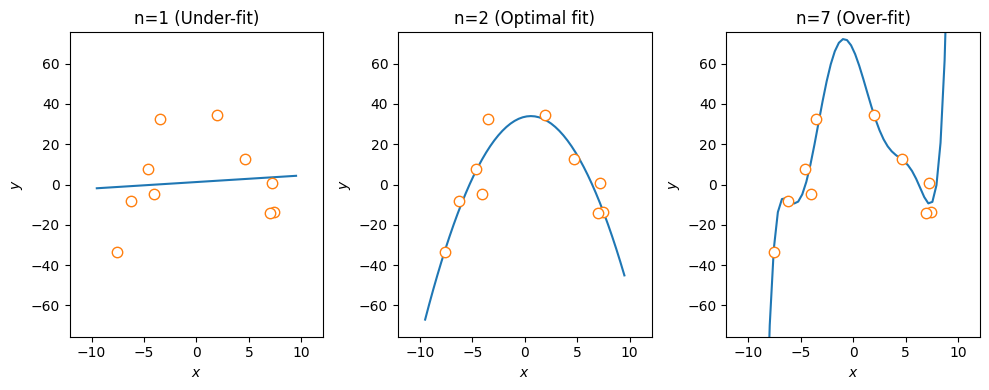

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
x_fit = np.linspace(-9.5, 9.5, 50)
X_fit = np.c_[x_fit]
i = 0
lab = ['Under-fit', 'Optimal fit', 'Over-fit']

for n in [1, 2, 7]:
    reg = make_pipeline(PolynomialFeatures(degree=n),
                        LinearRegression())
    reg.fit(X, y)
    y_fit = reg.predict(X_fit)
    ax[i].plot(x_fit, y_fit, "-")
    ax[i].plot(x, y, ".", markersize=15, markerfacecolor='white')
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')
    ax[i].set_title('n=' + str(n) + " (" + lab[i] + ")")
    ax[i].set_xlim([-12.1, 12.1])
    ax[i].set_ylim([-75.5, 75.5])
    i = i+1
    
plt.tight_layout()
plt.show()

To illustrate how regularization can help avoiding over-fitting in case of complex models, we will use the regularization of a polynomial model. Note that in practice it is more efficient to adjust the degree of the polynomial by cross validation rather than using regularization. We use here the polynomial model only as a model with high complexity (in the sens of having too many parameters compared what is required to adequately describe the data set).

## Ridge regression

Consider a data set which results in a features matrix $X$ and target values $y$ and a linear model with model parameters vector $\beta$. Ridge regression will minimize the following loss function:

$$
L(\beta) = ||y - X\beta||_2^2 + \alpha \cdot ||\beta||^2_2
$$

All norms involved at the l2 (or Euclidean) norm. The parameter $\alpha$ is a hyper-parameter. Note that in the case of $\alpha=0$, Ridge regression is the same as regular least square regression.

In scikit-learn the class [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) implements ridge regression. Note the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) added to the pipeline.

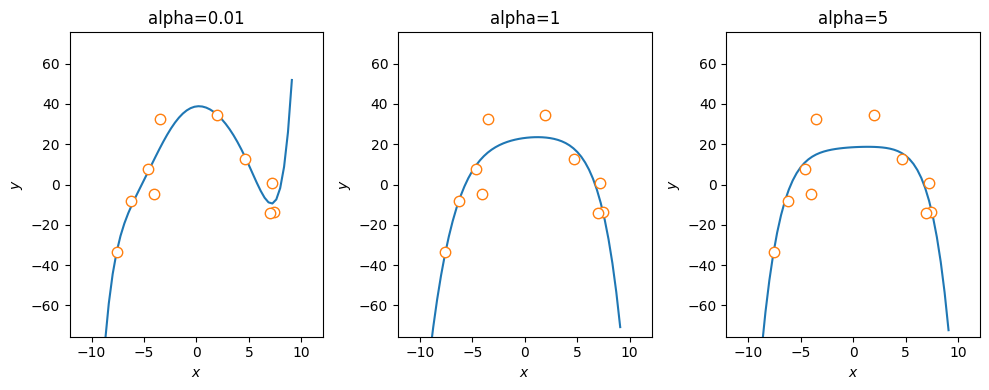

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
x_fit = np.linspace(-9.1, 9.1, 50)
X_fit = np.c_[x_fit]
i = 0

for alpha in [0.01, 1, 5]:
    reg = make_pipeline(StandardScaler(),
                        PolynomialFeatures(7),
                        Ridge(alpha=alpha))
    reg.fit(X, y)
    y_fit = reg.predict(X_fit)
    ax[i].plot(x_fit, y_fit, "-")
    ax[i].plot(x, y, ".", markersize=15, markerfacecolor='white')
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')
    ax[i].set_title('alpha=' + str(alpha))
    ax[i].set_xlim([-12.1, 12.1])
    ax[i].set_ylim([-75.5, 75.5])
    i = i+1
    
plt.tight_layout()
plt.show()

## LASSO regression

Consider a data set which results in a features matrix $X$ and target values $y$ and a linear model with model parameters vector $\beta$. LASSO regression will minimize the following loss function:

$$
L(\beta) = \frac{1}{2n}||y - X\beta||_2^2 + \alpha \cdot ||\beta||_1
$$

Here the $l_2$ norm (Euclidean norm) is used for the least square penalty (as for least square regression) and the $l_1$ norm (Manhattan norm) is used for the LASSO penalty. The parameter $\alpha$ is a hyper-parameter. Note that in the case of $\alpha=0$, LASSO regression is the same as regular least square regression.

In scikit-learn the class [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) implements LASSO regression. Note the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) added to the pipeline.

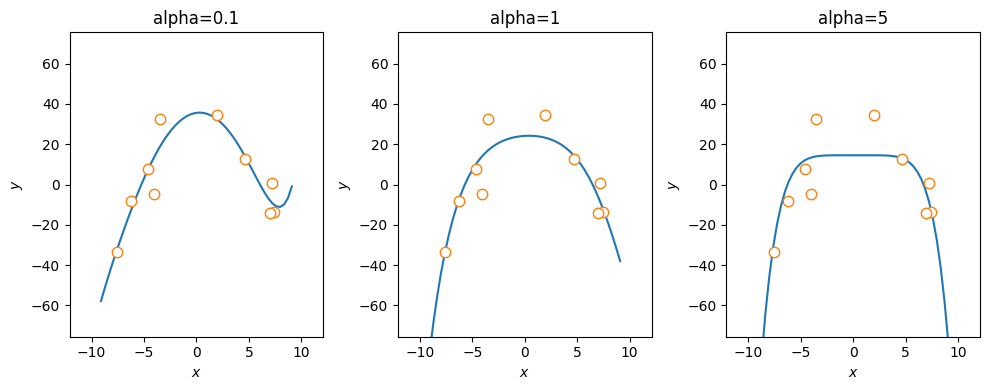

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
x_fit = np.linspace(-9.1, 9.1, 50)
X_fit = np.c_[x_fit]
i = 0

for alpha in [0.1, 1, 5]:
    reg = make_pipeline(StandardScaler(),
                        PolynomialFeatures(7),
                        Lasso(alpha=alpha))
    reg.fit(X, y)
    y_fit = reg.predict(X_fit)
    ax[i].plot(x_fit, y_fit, "-")
    ax[i].plot(x, y, ".", markersize=15, markerfacecolor='white')
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')
    ax[i].set_title('alpha=' + str(alpha))
    ax[i].set_xlim([-12.1, 12.1])
    ax[i].set_ylim([-75.5, 75.5])
    i = i+1
    
plt.tight_layout()
plt.show()

## ElasticNet regression

Consider a data set which results in a features matrix $X$ and target values $y$ and a linear model with model parameters vector $\beta$. ElasticNet regression will minimize the following loss function:

$$
L(\beta) = \frac{1}{2n}||y - X\beta||_2^2 + \alpha \cdot l_{1,ratio} \cdot ||\beta||_1 + \frac{\alpha}{2} (1-l_{1,ratio})||\beta||_2
$$

ElasticNet combines Ridge and LASSO penalties using the $l_2$ norm (Euclidean norm) for the least square and Ridge penalty and the $l_1$ norm (Manhattan norm) for the LASSO penalty. The parameters $\alpha$ and $l_{1,ratio}$ are a hyper-parameters. Note that in the case of $\alpha=0$, LASSO regression is the same as regular least square regression.

In scikit-learn the class [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) implements ElasticNet regression. Note the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) added to the pipeline.

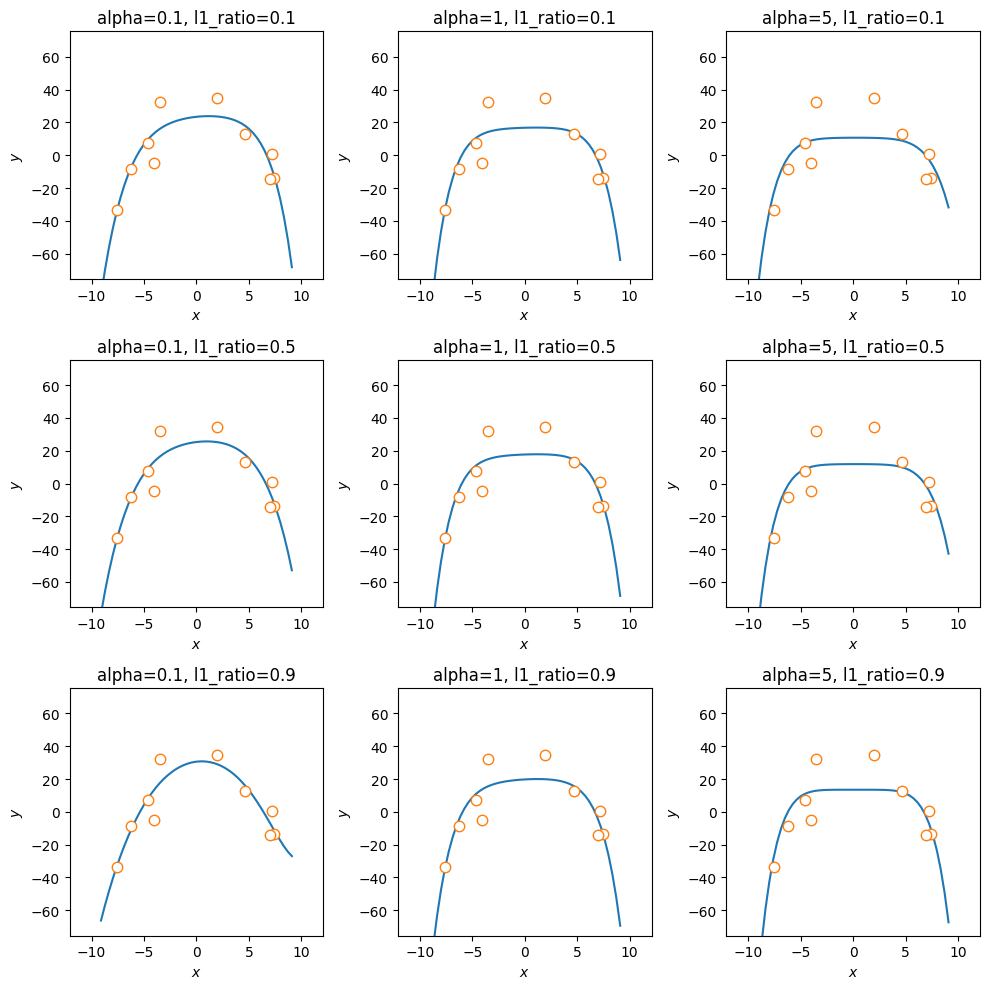

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
x_fit = np.linspace(-9.1, 9.1, 50)
X_fit = np.c_[x_fit]
i = 0
j = 0

for alpha in [0.1, 1, 5]:
    for ratio in [0.1, 0.5, 0.9]:
        reg = make_pipeline(StandardScaler(),
                            PolynomialFeatures(7),
                            ElasticNet(alpha=alpha, l1_ratio=ratio))
        reg.fit(X, y)
        y_fit = reg.predict(X_fit)
        ax[i, j].plot(x_fit, y_fit, "-")
        ax[i, j].plot(x, y, ".", markersize=15, markerfacecolor='white')
        ax[i, j].set_xlabel('$x$')
        ax[i, j].set_ylabel('$y$')
        ax[i, j].set_title('alpha=' + str(alpha) + ', l1_ratio=' + str(ratio))
        ax[i, j].set_xlim([-12.1, 12.1])
        ax[i, j].set_ylim([-75.5, 75.5])
        i = i + 1
    j = j + 1
    i = 0
    
plt.tight_layout()
plt.show()

## Suggested activities

* Use cross validation to optimize the hyper-parameters for the various regularization methods